In [1]:
import archive
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from termcolor import colored
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

In [2]:
pio.templates.default = "simple_white"
antq_blue = "#336699"
antq_purple = "#ac39ac"
antq_red = "#e63900"
antq_orange = "#ff8c1a"
faded_grey = "#e6e6e6"
light_grey = "#d9d9d9"
heading_font = "Brush Script MT, Brush Script Std, cursive"
normal_font = "times new roman"
palette = px.colors.qualitative.Set2
palette_r = px.colors.qualitative.Set2_r
set1 = px.colors.qualitative.Set1
set3 = px.colors.qualitative.Set3
warnings.filterwarnings('ignore')

In [3]:
number_of_rows_to_read = 1000
dataset = pd.read_csv(r"Data\anime.csv", delimiter=',',nrows=number_of_rows_to_read) 
dataset.dataframeName = 'anime.csv'
Row_dimension , Col_dimension = dataset.shape
print(f"There are {Row_dimension} rows and {Col_dimension} columns in the dataset we are using .")
dataset.head()
# this is returning me the data which is present in the dataset .     

There are 1000 rows and 7 columns in the dataset we are using .


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


THIS IS THE HISTOGRAM(Distributed graphs) 

In [4]:
# Distributed graphs (histogram/Bar graphs) of column data
def plot_per_column_distribution(dataset, n_graph_shown, n_graph_per_row):
    # Filter columns with unique values between 1 and 50
    nunique = dataset.nunique()
    selected_columns = dataset.columns[(nunique > 1) & (nunique < 50)] # we are only selecting unique values having the entries between 1 and 50 .
    dataset = dataset[selected_columns]

    n_row, n_col = dataset.shape
    column_names = list(dataset)

    # Calculate the number of rows for subplots
    n_graph_row = (n_col + n_graph_per_row - 1) // n_graph_per_row

    # Set up the figure size
    plt.figure(num=None, figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=100, facecolor='w', edgecolor='k')

    # Plot each selected column
    for i, col_name in enumerate(selected_columns[:n_graph_shown]):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_data = dataset[col_name]

        # Plot either bar chart or histogram based on data type
        if not np.issubdtype(type(column_data.iloc[0]), np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{col_name} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

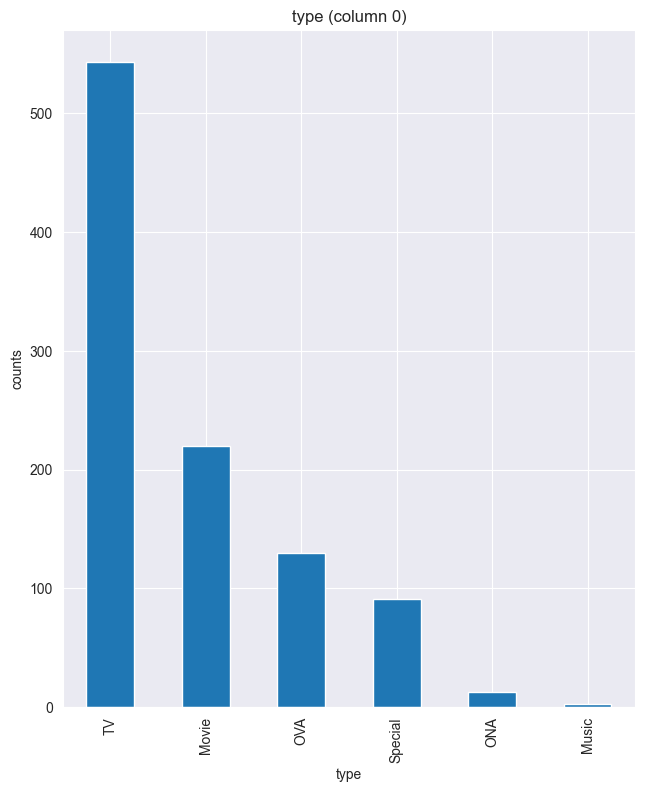

In [5]:
plot_per_column_distribution(dataset , 10 ,5)

THIS IS PLOT FOR NUMBER_OF_EPISODES VS RATINGS

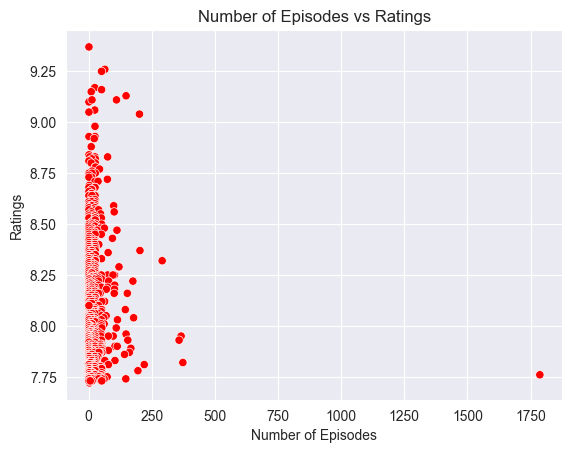

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'dataset'
dataset['episodes'] = pd.to_numeric(dataset['episodes'], errors='coerce')

# Using seaborn scatterplot with red and bright blue colors
sns.scatterplot(x=dataset.episodes, y=dataset.rating, hue=[0]*len(dataset), palette=['red', 'deepskyblue'])

plt.xlabel('Number of Episodes')
plt.ylabel('Ratings')
plt.title('Number of Episodes vs Ratings')
plt.xticks(range(0, int(max(dataset.episodes))+1, 250))
plt.legend().remove()  # Remove the legend if not needed
plt.show()


{'Romance', 'Space', 'Demons', 'Adventure', 'Magic', 'Ecchi', 'Police', 'Shoujo', 'Josei', 'Kids', 'Psychological', 'Cars', 'Shoujo Ai', 'Slice of Life', 'Super Power', 'Mecha', 'Game', 'Harem', 'Music', 'Shounen Ai', 'School', 'Action', 'Samurai', 'Dementia', 'Thriller', 'Historical', 'Drama', 'Seinen', 'Sports', 'Comedy', 'Horror', 'Mystery', 'Supernatural', 'Martial Arts', 'Shounen', 'Parody', 'Vampire', 'Sci-Fi', 'Fantasy', 'Military'}
Total Genres: 40


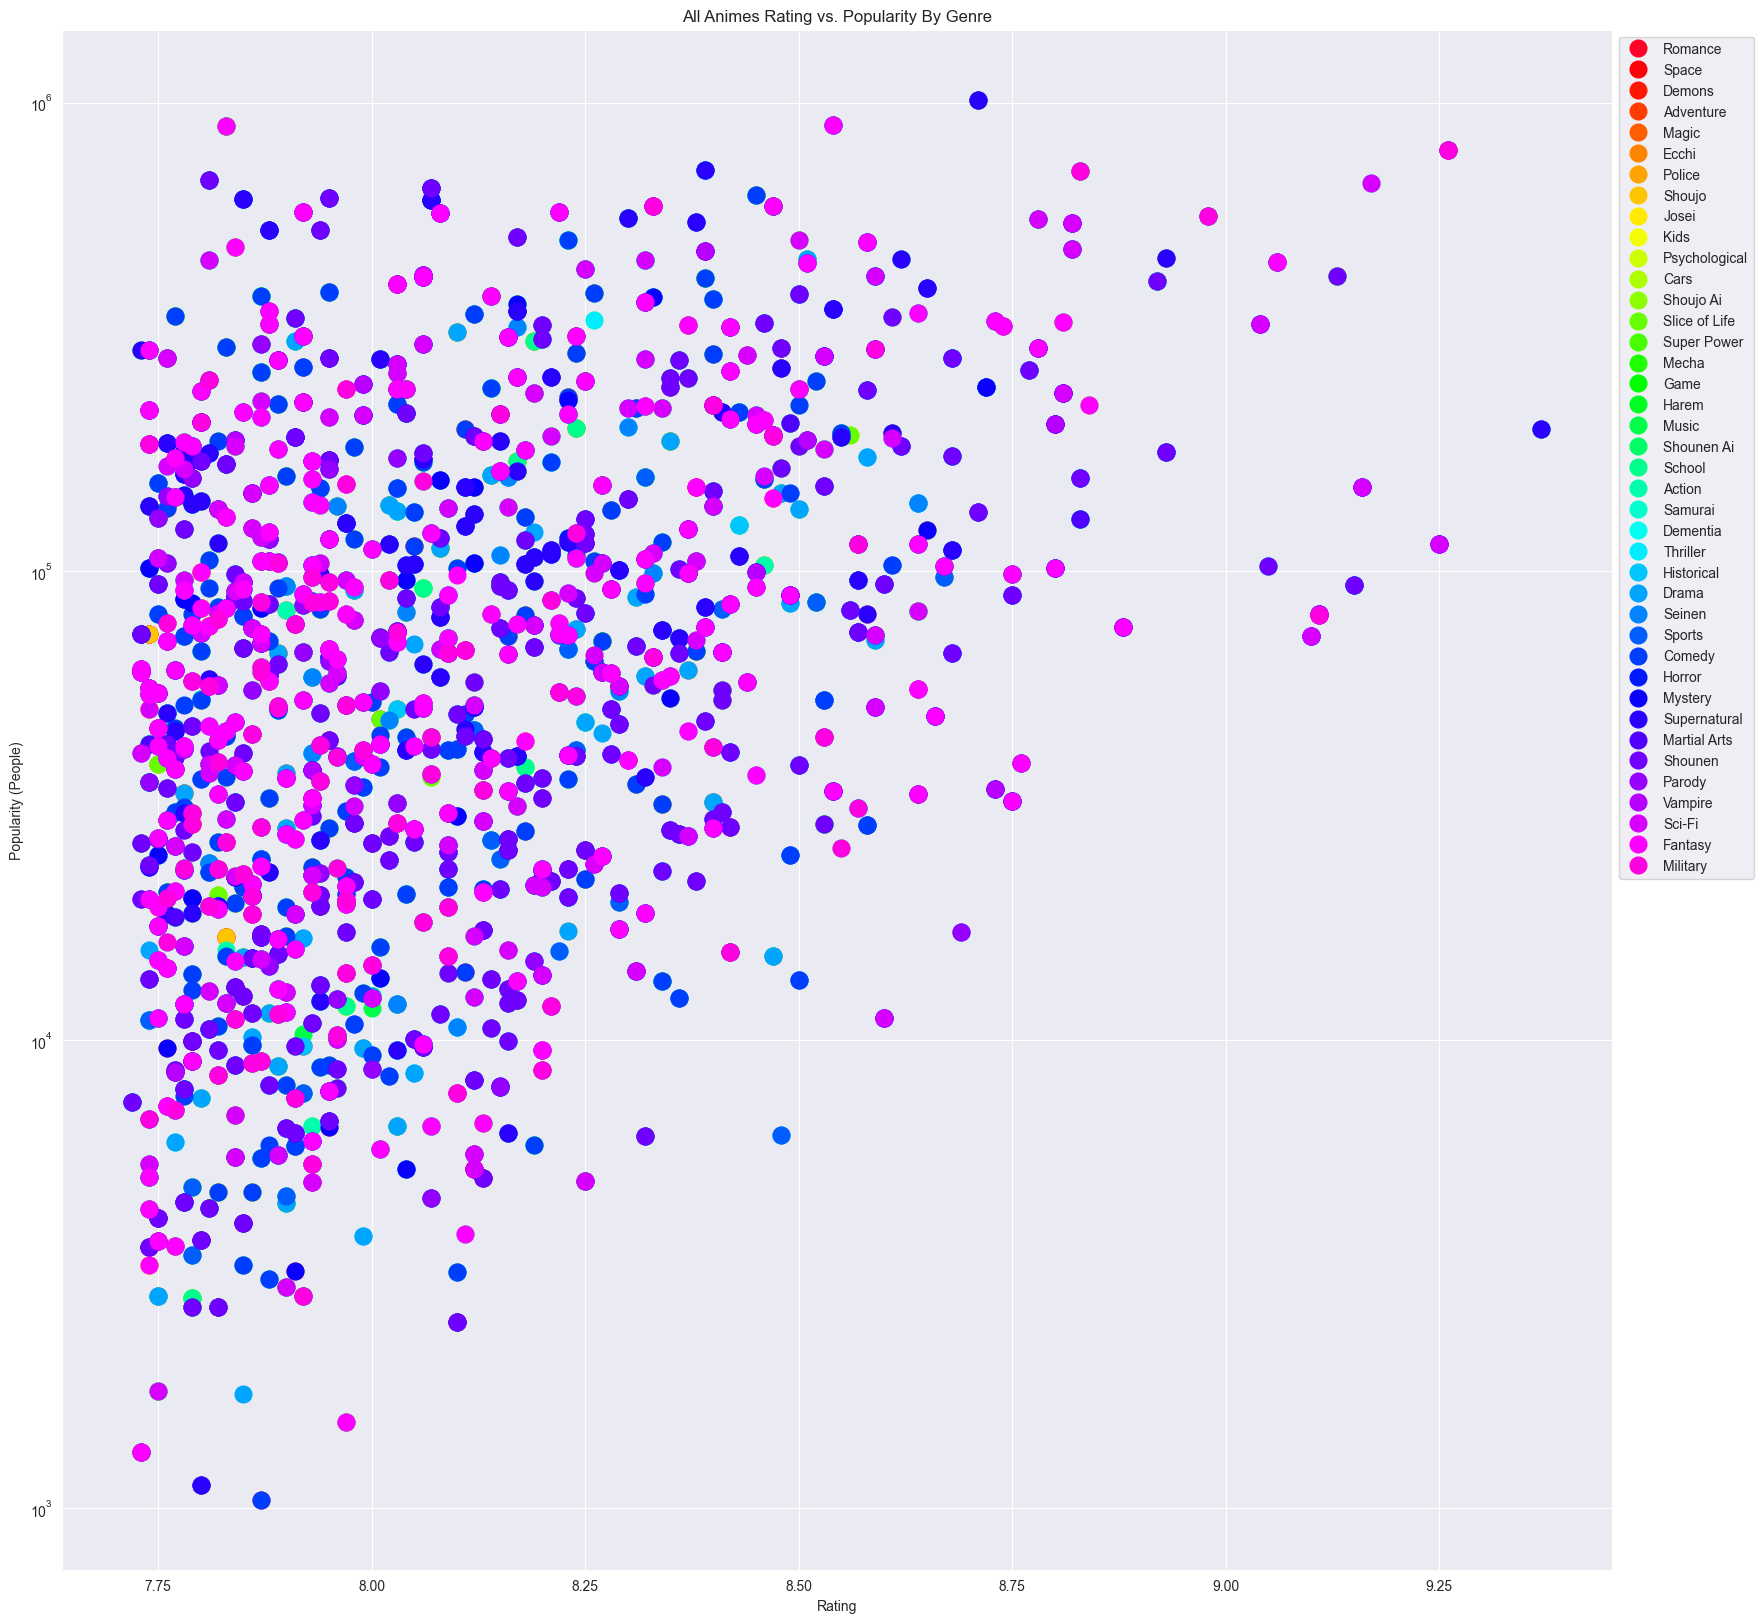

In [7]:
import matplotlib.pyplot as plt

genres = set(entry for entry in dataset.genre if isinstance(entry, str) for entry in entry.split(", "))
print(genres)
print("Total Genres:", len(genres))

plt.figure(figsize=(20, 20))
plt.title('All Animes Rating vs. Popularity By Genre')
plt.xlabel('Rating')
plt.ylabel('Popularity (People)')

num_colors = len(genres)
cm = plt.get_cmap('gist_rainbow')

plt.gca().set_prop_cycle('color', [cm(1. * i / num_colors) for i in range(num_colors)])
plt.yscale('log')

for genre in genres:
    data_genre = dataset[dataset.genre.str.contains(genre)]
    plt.plot(data_genre["rating"], data_genre["members"], marker='o', linestyle='', ms=12, label=genre)

plt.legend(numpoints=1, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
